In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url = "https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"

In [8]:
autos = pd.read_csv(url)

/var/folders/d8/m11cx23161lccrkqzwnp38_80000gn/T/ipykernel_14381/2372877960.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  autos = pd.read_csv(url)


In [32]:
makes = ['Tesla', 'Honda', 'Toyota', 'Ford', 'BMW']
colors = ['#e3128b', '#26725e', '#b3b099', '#ff2727', '#1a1aff']

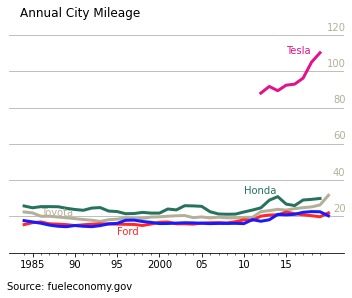

In [63]:
ax =(autos
 .query('make.isin(@makes)')
 .groupby(['year', 'make'])
 .city08
 .mean()
 .unstack()
 .loc[:,makes]
 .plot(color=colors, legend=False, linewidth=3)
)
plt.rcParams["font.family"] = "Roboto"
plt.grid(axis='y')
plt.suptitle('Annual City Mileage', ha='left', x=.15)
[ax.spines[side].set_visible(False) for side in ['top', 'left', 'right']]
#ax.yaxis.tick_right() #move to right - not needed i made my own labels
ax.tick_params(left=False) #hide ticks
ax.yaxis.set_label_coords(x=.05,
                          y=0.5)
ax.set_xlabel('')#clear x label
ax.set_xticks(minor=True, ticks=range(1984, 2020))
ax.set_xticks(ticks=range(1985, 2019, 5))
ax.set_xticklabels(['1985', '90', '95', '2000', '05', '10', '15'])
ax.set_yticks(ticks=range(0,121,20))
ax.set_yticklabels([]) # hide mpl labels 
for label in range(20, 121, 20):  #my own vertically shifted y-labels
    ax.text(2022, label+3, f'{label}',color=colors[-3], ha='right')
    
for label, pos, color in zip(makes, [(2015, 110), #label makes
                                     (2010, 33),
                                    (1986, 20.5),
                                    (1995,10),
                                    ], colors):
    ax.text(*pos, label, color=color, ha='left')
_ = ax.text(1982, -20, 'Source: fueleconomy.gov', ha='left')